# Lake Surface Extent Determination
To figure out how to the a good lake extent, and plot examples. 

In [1]:
%matplotlib widget
import pickle
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
with open('pickles/denss.pkl', 'rb') as f:
    abov, totl, mids, photon_data, surf_elev = pickle.load(f)

plt.close('all')

max_ratio=0.2
min_length=50.0
surf_width=0.4
abov_width=5.0
bin_width=1.0
smooth=21

dens_eval = np.max(np.vstack((abov,totl)),axis=0)
surf_possible = dens_eval < max_ratio
surf_possible[(mids<250) | (mids>(np.max(mids)-250))] = False # because we added two extra major frames on each side

# get surface segments that are continuous for longer than x meters
current_list = []
surface_segs = []
i = 0
while i < len(surf_possible):
    if surf_possible[i]:
        current_list.append(i)
    else:
        if (len(current_list) * bin_width) > min_length:
            surface_segs.append([mids[current_list[0]], mids[current_list[-1]]])
        current_list = []
    i += 1 
    
fig, (ax2, ax) = plt.subplots(nrows=2, figsize=[9, 5], dpi=100)
xlms = ((photon_data.xatc.min(), photon_data.xatc.max()))
pabov, = ax.plot(mids,abov,lw=0.5,label='density ratio above')
ptotl, = ax.plot(mids,totl,lw=0.5,label='density ratio all')
peval, = ax.plot(mids, dens_eval, 'k',label='density ratio max')
toplot = [max_ratio-0.01 if x else np.nan for x in surf_possible]
pthresh, = ax.plot(mids,toplot, 'y-',label='passes threshold')
for surf in surface_segs:
    ppass, = ax.plot(surf,[max_ratio, max_ratio], 'r-',label='is continuous surface')
ax.set_ylabel('relative density')
ax.set_xlabel('along-track distance [m]')
ax.set_xlim(xlms)
hdls=[pabov, ptotl, peval, pthresh, ppass]
ax.legend(handles=hdls, loc='upper center', fontsize=7)

pscatt = ax2.scatter(photon_data.xatc, photon_data.h, s=3, c='k', alpha=1, edgecolors='none',label='ATL03 data')
for surf in surface_segs:
    psurf, = ax2.plot(surf,[surf_elev, surf_elev], 'r-',label='lake surface extent')
ax2.set_ylabel('elevation above geoid [m]')
ax2.axes.xaxis.set_ticklabels([])
ax2.set_ylim((surf_elev-10, surf_elev+3))
ax2.set_xlim(xlms)
hdls = [pscatt, psurf]
ax2.legend(handles=hdls, loc='lower left', fontsize=7)

ax2.set_title('lake surface extent determination')
fig.tight_layout()
figname = 'figs_extent/surface-extent_example_' + datetime.now().strftime("%Y%m%d-%H%M%S") + '.jpg'
fig.savefig(figname, dpi=300, bbox_inches='tight', pad_inches=0)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

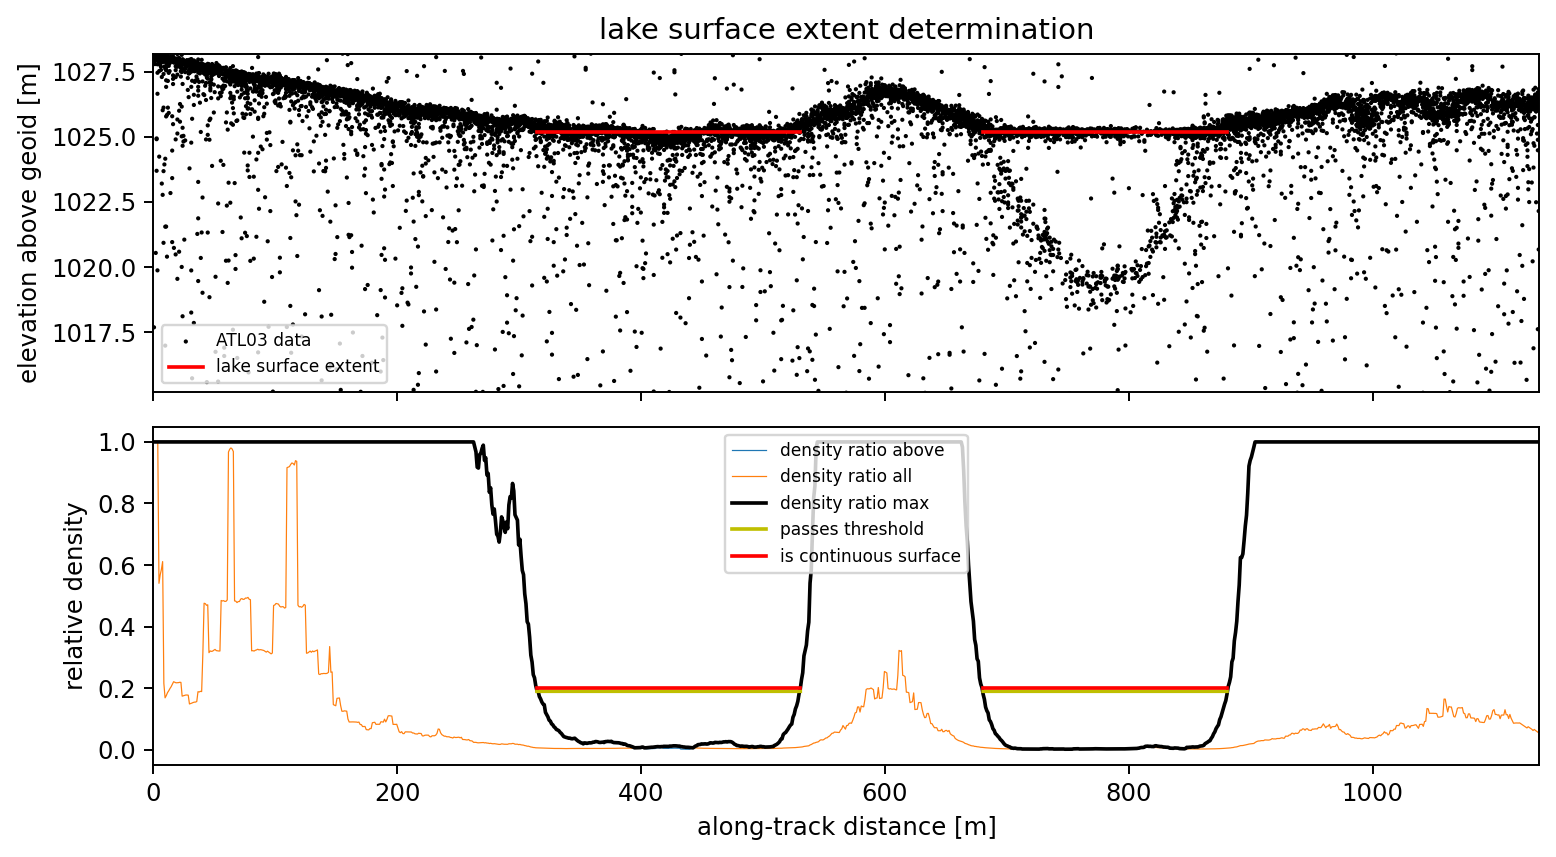

In [3]:
display(fig)